<a href="https://colab.research.google.com/github/shikharmay7/minor-project/blob/master/Copy_of_Colab_25GBRAM_flat_encoding_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!unzip /content/drive/MyDrive/Datasets/train_minor.zip

Streaming output truncated to the last 5000 lines.
 extracting: train_minor/00136/sample_000035/image_000042.png  
 extracting: train_minor/00136/sample_000035/image_000048.png  
 extracting: train_minor/00136/sample_000035/image_000014.png  
 extracting: train_minor/00136/sample_000035/image_000001.png  
 extracting: train_minor/00136/sample_000035/image_000033.png  
 extracting: train_minor/00136/sample_000035/image_000002.png  
 extracting: train_minor/00136/sample_000035/image_000024.png  
 extracting: train_minor/00136/sample_000035/image_000021.png  
 extracting: train_minor/00136/sample_000035/image_000030.png  
 extracting: train_minor/00136/sample_000035/image_000039.png  
 extracting: train_minor/00136/sample_000035/image_000036.png  
 extracting: train_minor/00136/sample_000035/image_000023.png  
 extracting: train_minor/00136/sample_000035/image_000016.png  
 extracting: train_minor/00136/sample_000035/image_000041.png  
 extracting: train_minor/00136/sample_000035/image_00

In [4]:
!unzip /content/drive/MyDrive/Datasets/test_minor.zip

Streaming output truncated to the last 5000 lines.
 extracting: test_minor/00008/sample_000009/image_000041.png  
 extracting: test_minor/00008/sample_000009/image_000040.png  
 extracting: test_minor/00008/sample_000009/image_000005.png  
 extracting: test_minor/00008/sample_000009/image_000007.png  
 extracting: test_minor/00008/sample_000009/image_000018.png  
 extracting: test_minor/00008/sample_000009/image_000038.png  
 extracting: test_minor/00008/sample_000009/image_000037.png  
 extracting: test_minor/00008/sample_000009/image_000049.png  
 extracting: test_minor/00008/sample_000009/image_000050.png  
 extracting: test_minor/00008/sample_000009/image_000046.png  
 extracting: test_minor/00008/sample_000009/image_000004.png  
 extracting: test_minor/00008/sample_000009/image_000006.png  
 extracting: test_minor/00008/sample_000009/image_000020.png  
 extracting: test_minor/00008/sample_000009/image_000027.png  
 extracting: test_minor/00008/sample_000009/image_000026.png  
 ext

In [5]:
base_path = "/content/train_minor"

In [6]:
dir_list = os.listdir(base_path)
len(dir_list)

34

In [7]:
listOfFiles = list()
for (dirpath, dirnames, filenames) in os.walk(base_path):
  listOfFiles += [os.path.join(dirpath, file) for file in filenames]

In [8]:
listOfFiles.sort()

In [10]:
listOfFiles

['/content/train_minor/00001/sample_000002/image_000001.png',
 '/content/train_minor/00001/sample_000002/image_000002.png',
 '/content/train_minor/00001/sample_000002/image_000003.png',
 '/content/train_minor/00001/sample_000002/image_000004.png',
 '/content/train_minor/00001/sample_000002/image_000005.png',
 '/content/train_minor/00001/sample_000002/image_000006.png',
 '/content/train_minor/00001/sample_000002/image_000007.png',
 '/content/train_minor/00001/sample_000002/image_000008.png',
 '/content/train_minor/00001/sample_000002/image_000009.png',
 '/content/train_minor/00001/sample_000002/image_000010.png',
 '/content/train_minor/00001/sample_000002/image_000011.png',
 '/content/train_minor/00001/sample_000002/image_000012.png',
 '/content/train_minor/00001/sample_000002/image_000013.png',
 '/content/train_minor/00001/sample_000002/image_000014.png',
 '/content/train_minor/00001/sample_000002/image_000015.png',
 '/content/train_minor/00001/sample_000002/image_000016.png',
 '/conte

In [11]:
# Importing Keras libraries
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import VGG16, ResNet50
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D, Input, BatchNormalization, GRU
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D, Conv1D, Activation, TimeDistributed
from keras import Model
from keras.optimizers import Adam

In [12]:
def show_imgs(X):
    plt.figure(figsize=(8, 8))
    k = 100
    for i in range(0,4):
        for j in range(0,4):
            
            image = load_img(X[k])
            plt.subplot2grid((4,4),(i,j))
            plt.imshow(image)

            k = k+1
    # show the plot
    plt.show()

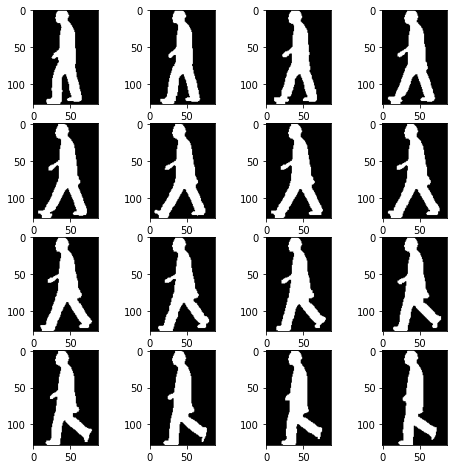

In [13]:
show_imgs(listOfFiles)

In [17]:
img = load_img(listOfFiles[0])
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = imagenet_utils.preprocess_input(img)
features_flatten = img.reshape((1,128*88*3))
# plt.imshow(img)
features_flatten.shape

(1, 33792)

In [18]:
Tx = 50 #the number of time steps input to the model
n_freq = 33792  #number of features input to the model
m = 1020  #the number of training examples
X = np.zeros((m, Tx, n_freq))

In [19]:
for i in range(1020):
  for j in range(50):
    k = i*50 + j
    img = load_img(listOfFiles[k])
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = imagenet_utils.preprocess_input(img)
    # features = model1.predict(img)
    features_flatten = img.reshape((1,128*88*3))
    X[i][j] = features_flatten

In [21]:
X.shape

(1020, 50, 33792)

In [ ]:
# np.save('/content/drive/My Drive/minorX.npy',X)

In [22]:
label_dict = {0: '00001', 
              1: '00003', 
              2: '00008', 
              3: '00055',
              4: '00094',
              5: '00095', 
              6: '00096', 
              7: '00098', 
              8: '00099',
              9: '00100',
              10:'00101',
              11:'00104',
              12:'00106',
              13:'00111',
              14:'00112',
              15:'00116',
              16:'00117',
              17:'00118',
              18:'00124',
              19:'00126',
              20:'00128',
              21:'00132',
              22:'00133',
              23:'00134',
              24:'00136',
              25:'00137',
              26:'00140',
              27:'00143',
              28:'00145',
              29:'00146',
              30:'00147',
              31:'00148',
              32:'00149',
              33:'00150'}

In [23]:
Y=[]
for i in range(34):
  for j in range(30):
    Y.append(i)

In [24]:
nb_class = 34
y_hot = np_utils.to_categorical(Y, nb_class)
# y_hot[:20]

In [ ]:
# np.save('/content/drive/My Drive/minorY.npy', y_hot)

In [25]:
pip install keras-segmentation

     |████████████████████████████████| 3.3MB 8.4MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp36-none-any.whl size=29072 sha256=45d1d910e0ac55e5d57275f62f1174e91b7ed7f29d6e49c7a02fc1a7b6124f92
  Stored in directory: /root/.cache/pip/wheels/d0/bb/c0/6aad88b38f6e46db048bed4cccb904a5897055a8ab6fbd4dfc
Successfully built keras-segmentation
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1


In [26]:
pip install git+https://github.com/divamgupta/image-segmentation-keras.git

  Cloning https://github.com/divamgupta/image-segmentation-keras.git to /tmp/pip-req-build-1a1zym8z
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras.git /tmp/pip-req-build-1a1zym8z
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp36-none-any.whl size=30506 sha256=c2f869daba2002537b0c226bb20d9eb60eddb00457ef6b6315d6a2c2d1dba1ad
  Stored in directory: /tmp/pip-ephem-wheel-cache-hvdtk1vk/wheels/0a/4e/8b/d3f9088958a351a72f48ede4558836b78a03c0c124f81f41ed
Successfully built keras-segmentation


In [27]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.core.protobuf import rewriter_config_pb2
# from tensorflow.keras.backend import set_session
tf.keras.backend.clear_session()  # For easy reset of notebook state.

config_proto = tf.ConfigProto()
off = rewriter_config_pb2.RewriterConfig.OFF
config_proto.graph_options.rewrite_options.arithmetic_optimization = off
session = tf.Session(config=config_proto)
set_session(session)

Instructions for updating:
non-resource variables are not supported in the long term


In [28]:
def model(input_shape):
    """
    Function creating the model's graph in Keras.
    
    Argument:
    input_shape -- shape of the model's input data (using Keras conventions)

    Returns:
    model -- Keras model instance
    """
    
    X_input = Input(shape = input_shape)
    
    # Step 1: CONV layer (≈4 lines)
    X = Conv1D(filters=196,kernel_size=15,strides=4)(X_input)                                 # CONV1D
    X = BatchNormalization()(X)                                  # Batch normalization
    X = Activation("relu")(X)                                 # ReLu activation
    X = Dropout(rate=0.8)(X)                                 # dropout (used 0.8)

    # Step 2: First GRU Layer (≈4 lines)
    X = GRU(units=128, return_sequences =True)(X)    # GRU (used 128 units and return the sequences)
    X = Dropout(rate=0.8)(X)                                   # dropout (used 0.8)
    X = BatchNormalization()(X)                                 # Batch normalization
    
    # Step 3: Second GRU Layer (≈4 lines)
    X = GRU(units=128)(X)                                 # GRU (use 128 units and return the sequences)
    X = Dropout(rate=0.8)(X)                                 # dropout (used 0.8)
    X = BatchNormalization()(X)                                  # Batch normalization
    X = Dropout(rate=0.8)(X)                                 # dropout (used 0.8)
    # X=Flatten()(X)


    # Step 4: Time-distributed dense layer 
    X = Dense(34, activation = "softmax")(X) # time distributed  (sigmoid)
    
    ### END CODE HERE ###

    model = Model(inputs = X_input, outputs = X)
    
    return model

In [29]:
model = model(input_shape = (Tx, n_freq))

In [30]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 33792)]       0         
_________________________________________________________________
conv1d (Conv1D)              (None, 9, 196)            99348676  
_________________________________________________________________
batch_normalization (BatchNo (None, 9, 196)            784       
_________________________________________________________________
activation (Activation)      (None, 9, 196)            0         
_________________________________________________________________
dropout (Dropout)            (None, 9, 196)            0         
_________________________________________________________________
gru (GRU)                    (None, 9, 128)            125184    
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 128)           

In [31]:
opt = Adam(lr=0.0001, beta_1 = 0.9, beta_2 = 0.999, decay=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

In [32]:
model.fit(X,y_hot, batch_size=8, epochs=20)

Train on 1020 samples
Epoch 1/20
1020/1020 [==============================] - 21s 21ms/sample - loss: 5.9049 - acc: 0.0235
Epoch 2/20
1020/1020 [==============================] - 21s 21ms/sample - loss: 5.9208 - acc: 0.0314
Epoch 3/20
1020/1020 [==============================] - 21s 21ms/sample - loss: 5.9236 - acc: 0.0284
Epoch 4/20
1020/1020 [==============================] - 21s 21ms/sample - loss: 5.9139 - acc: 0.0363
Epoch 5/20
1020/1020 [==============================] - 21s 21ms/sample - loss: 6.0703 - acc: 0.0265
Epoch 6/20
1020/1020 [==============================] - 21s 21ms/sample - loss: 5.9613 - acc: 0.0284
Epoch 7/20
1020/1020 [==============================] - 21s 21ms/sample - loss: 5.9502 - acc: 0.0235
Epoch 8/20
1020/1020 [==============================] - 21s 21ms/sample - loss: 5.8202 - acc: 0.0353
Epoch 9/20
1020/1020 [==============================] - 21s 21ms/sample - loss: 5.9511 - acc: 0.0343
Epoch 10/20
1020/1020 [==============================] - 21s 20ms/sam